Primeiro importamos as Bibliotecas necessárias

Numpy para operações com arrays, matplotlib para visualização, load_iris para carregar o dataset, GaussianNB para nosso modelo Naive Bayes.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.naive_bayes import GaussianNB
from matplotlib.patches import Patch

Aqui carregamos os dados e escolhemos duas variáveis (features) — isso é importante para que possamos plotar os dados em um gráfico 2D.
X são as características, y são as classes (espécies das flores).

In [2]:
# Carregar o dataset
iris = load_iris()
X = iris.data[:, 2:4]  # Apenas comprimento e largura da pétala
y = iris.target
target_names = iris.target_names

Criamos e treinamos o modelo Naive Bayes com os dados que selecionamos.

In [3]:
# Treinar o modelo Naive Bayes
modelo = GaussianNB()
modelo.fit(X, y)

GaussianNB()

Criamos uma grade de pontos em todo o espaço das variáveis para que possamos prever a classe em cada ponto e desenhar as regiões no gráfico.

In [4]:
# Criar a malha para a fronteira de decisão
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))
grid = np.c_[xx.ravel(), yy.ravel()]


 Aqui, usamos o modelo para prever as classes em cada ponto do grid.
Depois, reorganizamos os resultados para que possam ser desenhados como uma imagem de fundo.

In [5]:
# Prever a classe para cada ponto do grid
Z = modelo.predict(grid)
Z = Z.reshape(xx.shape)

Por fim, desenhamos o gráfico!
As regiões coloridas mostram como o Naive Bayes separa as espécies de flores, e os pontos mostram as amostras reais.
Criamos uma legenda colorida associando as classes às suas respectivas espécies de flores

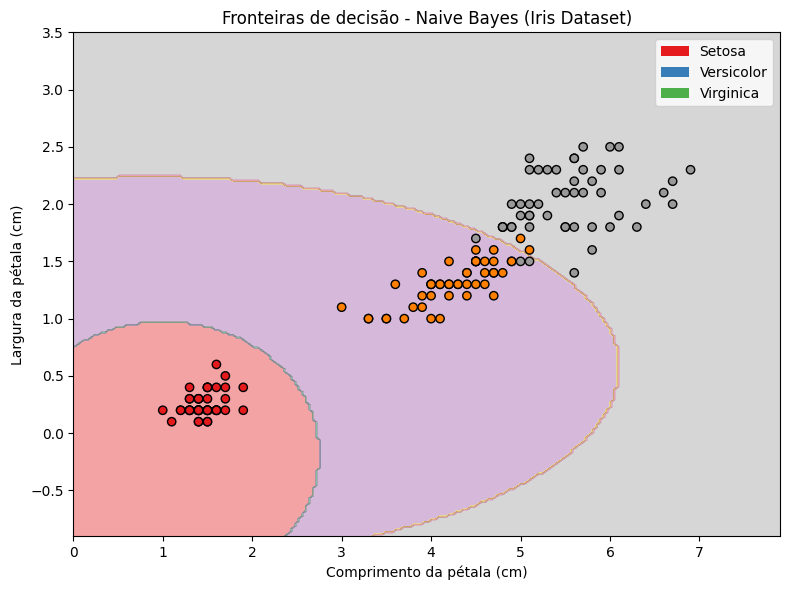

In [8]:
# Plotar fronteiras
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.Set1)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap=plt.cm.Set1)
plt.xlabel('Comprimento da pétala (cm)')
plt.ylabel('Largura da pétala (cm)')
plt.title('Fronteiras de decisão - Naive Bayes (Iris Dataset)')

# Legenda
legend_elements = [
    Patch(facecolor=plt.cm.Set1(0), label='Setosa'),
    Patch(facecolor=plt.cm.Set1(1), label='Versicolor'),
    Patch(facecolor=plt.cm.Set1(2), label='Virginica')
]
plt.legend(handles=legend_elements, loc='upper right')

# Mostrar gráfico
plt.tight_layout()
plt.show()
